In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Exploring data for its analysis

In [2]:
# Loading cleaned dataset
homicidios_2018 = pd.read_csv('./modified_dataset/homicidios_2018.csv')

# 3. a. What were the top municipalities with highest quantity of murders by month?

The first step to answer this question is to extract from Fecha data the day, month and year and create three new columns for each of those, as follows:

In [3]:
homicidios_2018['NUMERO_DIA'] = homicidios_2018.FECHA.str.split('/').str[0].astype(int)
homicidios_2018['MES'] = (homicidios_2018.FECHA.str.split('/').str[1]).astype(int)
homicidios_2018['ANO'] = (homicidios_2018.FECHA.str.extract('/(.+?) '))[0].str.split('/').str[1].astype(int)
homicidios_2018

,FECHA,DEPARTAMENTO,MUNICIPIO,DIA,HORA,BARRIO,ZONA,CLASE SITIO,ARMA EMPLEADA,MOVIL AGRESOR,...,EDAD,GENERO,ESTADO CIVIL,PAIS NACIMIENTO,CLASE EMPLEADO,ESCOLARIDAD,CODIGO DANE,NUMERO_DIA,MES,ANO
0,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),LUNES,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,16.0,MASCULINO,SOLTERO,BRASIL,EMPLEADO PARTICULAR,SECUNDARIA,91001000.0,1,1,2018
1,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),LUNES,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,17.0,MASCULINO,SOLTERO,BRASIL,EMPLEADO PARTICULAR,SECUNDARIA,91001000.0,1,1,2018
2,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,LUNES,8:30:00,ALTO DEL CEDRON,RURAL,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,26.0,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,PRIMARIA,5034000.0,1,1,2018
3,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,LUNES,2:30:00,PARQUE PRINCIPAL,RURAL,PARQUES,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,30.0,MASCULINO,SOLTERO,COLOMBIA,AGRICULTOR,PRIMARIA,5034000.0,1,1,2018
4,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,3:30:00,TENCHE,RURAL,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,...,25.0,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,PRIMARIA,5040000.0,1,1,2018
5,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,7:40:00,LA GUACAMAYA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,56.0,MASCULINO,UNION LIBRE,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5040000.0,1,1,2018
6,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,5:35:00,PARQUE PRINCIPAL,URBANA,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,...,25.0,FEMENINO,SOLTERO,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5040000.0,1,1,2018
7,01/01/2018 12:00:00 AM,ANTIOQUIA,CAUCASIA,LUNES,0:01:00,EL BOSQUE,URBANA,TRAMO DE VIA,CONTUNDENTES,A PIE,...,19.0,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,PRIMARIA,5154000.0,1,1,2018
8,01/01/2018 12:00:00 AM,ANTIOQUIA,HISPANIA,LUNES,18:30:00,LA CANCHA,URBANA,ESTABLECIMIENTO PUBLICO,ARMA DE FUEGO,A PIE,...,32.0,FEMENINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,TECNOLOGO,5353000.0,1,1,2018
9,01/01/2018 12:00:00 AM,ANTIOQUIA,ITAGUI,LUNES,2:45:00,SANTA MARIA # 2,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,PASAJERO MOTOCICLETA,...,25.0,MASCULINO,SOLTERO,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5360000.0,1,1,2018


'top_month' variable will allow me to save the top 5 cities with highest number of murders by month

In [4]:
top_month = {}
for elem in range(12):
    top_month[(elem)] = homicidios_2018[homicidios_2018['MES'] == (elem+1)]['MUNICIPIO'].value_counts().head()

top_month

{0: CALI (CT)               44
 BOGOTÁ D.C. (CT)        34
 MEDELLÍN (CT)            9
 SAN ANDRES DE TUMACO     9
 SOACHA                   7
 Name: MUNICIPIO, dtype: int64, 1: CALI (CT)               40
 BOGOTÁ D.C. (CT)        38
 BARRANQUILLA (CT)       21
 MEDELLÍN (CT)           20
 SAN ANDRES DE TUMACO    12
 Name: MUNICIPIO, dtype: int64, 2: CALI (CT)               48
 BOGOTÁ D.C. (CT)        37
 MEDELLÍN (CT)           13
 SAN ANDRES DE TUMACO    11
 CARTAGENA (CT)          11
 Name: MUNICIPIO, dtype: int64, 3: CALI (CT)            48
 BOGOTÁ D.C. (CT)     36
 MEDELLÍN (CT)        18
 TARAZÁ               14
 BARRANQUILLA (CT)    13
 Name: MUNICIPIO, dtype: int64, 4: BOGOTÁ D.C. (CT)     35
 CALI (CT)            31
 MEDELLÍN (CT)        21
 CARTAGENA (CT)        9
 BARRANQUILLA (CT)     8
 Name: MUNICIPIO, dtype: int64, 5: CALI (CT)            38
 BOGOTÁ D.C. (CT)     28
 MEDELLÍN (CT)        28
 BARRANQUILLA (CT)    13
 PALMIRA              10
 Name: MUNICIPIO, dtype: int64, 

Below, I have created a way to plot the top 5 municipalities with highest quantity of homicides.

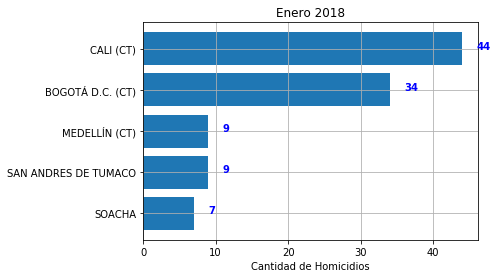

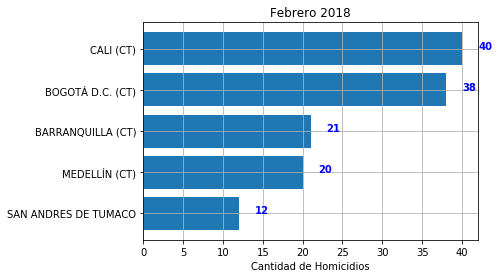

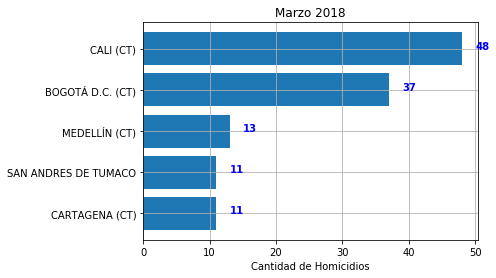

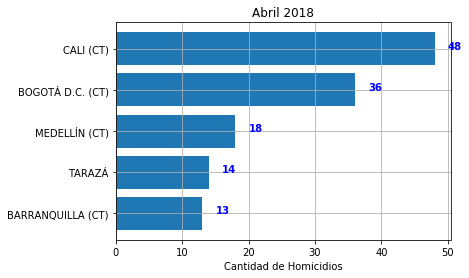

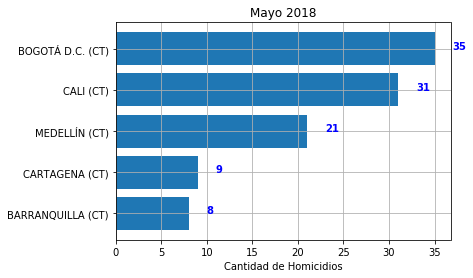

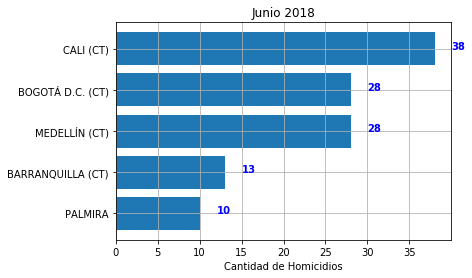

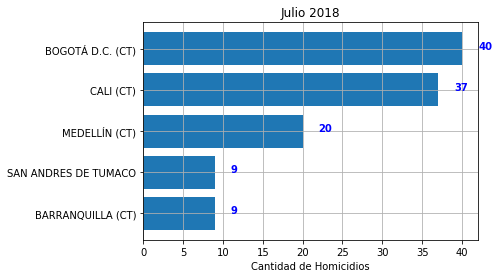

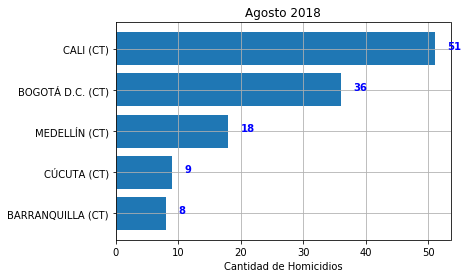

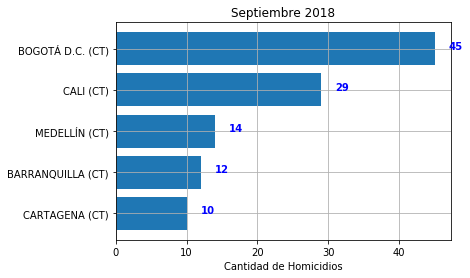

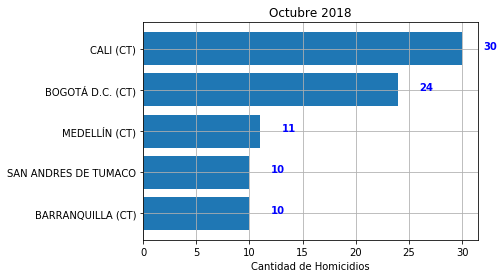

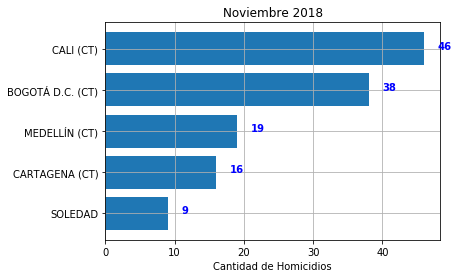

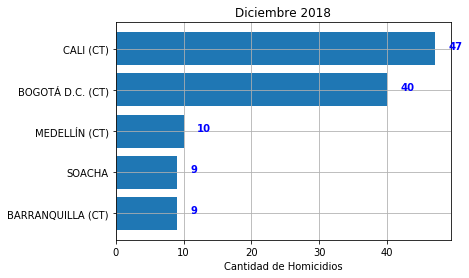

In [5]:
num_month = 0
MONTHS = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

for column in range(len(MONTHS)):
    plt.figure()
    plt.barh(list(top_month[num_month].index),top_month[num_month])
    plt.gca().invert_yaxis()
    plt.title(str(MONTHS[num_month])+ ' 2018')
    plt.xlabel('Cantidad de Homicidios')
    plt.grid(True)
    for i, v in enumerate(top_month[num_month]):
        plt.text(v + 2, i, str(v), color='blue', fontweight='bold')
    num_month += 1

plt.show()

## Cali is the top city for 9 months while Bogota leads for the other 3 months.

# 3. b. For Bogota, what neighborhoods reported greater amount of murders between 6 at night and 12 midnight.


In [6]:
homicidios_2018[homicidios_2018['MUNICIPIO'] == 'BOGOTÁ D.C. (CT)']['BARRIO'].value_counts()

LA FAVORITA E-14                 9
CARACOLI E-19                    6
GRAN BRITALIA E-8                5
LAS MARGARITAS E-8               5
QUIBA E-19                       5
ARBORIZADORA ALTA E-19           5
LOS ALPES E-19                   4
EL MOCHUELO ORIENTAL E-19        4
JUAN REY E-4                     4
LA ESTANZUELA E-14               4
PATIO BONITO I E-8               4
DIANA TURBAY E-18                4
SAN FRANCISCO E-19               4
EL PARAISO E-19                  3
SAN BENITO E-6                   3
CIUDAD DE CALI E-8               3
JUAN PABLO II E-19               3
MARIA PAZ E-8                    3
RESTREPO E-15                    3
VOTO NACIONAL E-14               3
BARRANQUILLITA E-5               3
MADELENA I Y II SECTOR E-19      3
CANDELARIA III-IV E-19           3
LA VICTORIA E-4                  3
CLASS E-8                        3
SIERRA MORENA E-19               3
LLANO GRANDE E-8                 3
ARABIA E-19                      3
VILLAS DEL PROGRESO 

In [7]:
homicidios_2018[homicidios_2018['MUNICIPIO'] == 'BOGOTÁ D.C. (CT)']['BARRIO'].shape

(431,)

In [8]:
homicidios_2018[homicidios_2018['MUNICIPIO'] == 'BOGOTÁ D.C. (CT)']['BARRIO'].value_counts()

LA FAVORITA E-14                 9
CARACOLI E-19                    6
GRAN BRITALIA E-8                5
LAS MARGARITAS E-8               5
QUIBA E-19                       5
ARBORIZADORA ALTA E-19           5
LOS ALPES E-19                   4
EL MOCHUELO ORIENTAL E-19        4
JUAN REY E-4                     4
LA ESTANZUELA E-14               4
PATIO BONITO I E-8               4
DIANA TURBAY E-18                4
SAN FRANCISCO E-19               4
EL PARAISO E-19                  3
SAN BENITO E-6                   3
CIUDAD DE CALI E-8               3
JUAN PABLO II E-19               3
MARIA PAZ E-8                    3
RESTREPO E-15                    3
VOTO NACIONAL E-14               3
BARRANQUILLITA E-5               3
MADELENA I Y II SECTOR E-19      3
CANDELARIA III-IV E-19           3
LA VICTORIA E-4                  3
CLASS E-8                        3
SIERRA MORENA E-19               3
LLANO GRANDE E-8                 3
ARABIA E-19                      3
VILLAS DEL PROGRESO 

Creating columns for a much easier analysis of the timeframe

In [9]:
homicidios_2018['HORA_'] = homicidios_2018.HORA.str.split(':').str[0].astype(int)
homicidios_2018['MINUTOS_'] = homicidios_2018.HORA.str.split(':').str[1].astype(int)
homicidios_2018

,FECHA,DEPARTAMENTO,MUNICIPIO,DIA,HORA,BARRIO,ZONA,CLASE SITIO,ARMA EMPLEADA,MOVIL AGRESOR,...,ESTADO CIVIL,PAIS NACIMIENTO,CLASE EMPLEADO,ESCOLARIDAD,CODIGO DANE,NUMERO_DIA,MES,ANO,HORA_,MINUTOS_
0,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),LUNES,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,SOLTERO,BRASIL,EMPLEADO PARTICULAR,SECUNDARIA,91001000.0,1,1,2018,9,45
1,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),LUNES,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,SOLTERO,BRASIL,EMPLEADO PARTICULAR,SECUNDARIA,91001000.0,1,1,2018,9,45
2,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,LUNES,8:30:00,ALTO DEL CEDRON,RURAL,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,SOLTERO,COLOMBIA,INDEPENDIENTE,PRIMARIA,5034000.0,1,1,2018,8,30
3,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,LUNES,2:30:00,PARQUE PRINCIPAL,RURAL,PARQUES,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,SOLTERO,COLOMBIA,AGRICULTOR,PRIMARIA,5034000.0,1,1,2018,2,30
4,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,3:30:00,TENCHE,RURAL,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,...,UNION LIBRE,COLOMBIA,INDEPENDIENTE,PRIMARIA,5040000.0,1,1,2018,3,30
5,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,7:40:00,LA GUACAMAYA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,UNION LIBRE,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5040000.0,1,1,2018,7,40
6,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,5:35:00,PARQUE PRINCIPAL,URBANA,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,...,SOLTERO,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5040000.0,1,1,2018,5,35
7,01/01/2018 12:00:00 AM,ANTIOQUIA,CAUCASIA,LUNES,0:01:00,EL BOSQUE,URBANA,TRAMO DE VIA,CONTUNDENTES,A PIE,...,SOLTERO,COLOMBIA,INDEPENDIENTE,PRIMARIA,5154000.0,1,1,2018,0,1
8,01/01/2018 12:00:00 AM,ANTIOQUIA,HISPANIA,LUNES,18:30:00,LA CANCHA,URBANA,ESTABLECIMIENTO PUBLICO,ARMA DE FUEGO,A PIE,...,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,TECNOLOGO,5353000.0,1,1,2018,18,30
9,01/01/2018 12:00:00 AM,ANTIOQUIA,ITAGUI,LUNES,2:45:00,SANTA MARIA # 2,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,PASAJERO MOTOCICLETA,...,SOLTERO,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5360000.0,1,1,2018,2,45


In [10]:
homicidios_2018_b = homicidios_2018[(homicidios_2018['HORA_'] > 17) | ((homicidios_2018['HORA_'] == 0) & (homicidios_2018['MINUTOS_'] == 0))]
print(homicidios_2018_b.shape)
homicidios_2018_b[homicidios_2018_b['MUNICIPIO'] == 'BOGOTÁ D.C. (CT)']['BARRIO'].value_counts().head()

(1921, 23)


LA FAVORITA E-14          4
BARRANQUILLITA E-5        3
GRAN BRITALIA E-8         3
DIANA TURBAY E-18         3
ARBORIZADORA ALTA E-19    3
Name: BARRIO, dtype: int64

## Between 6pm and 12 midnight the top five neighborhoods for quantity of murders were LA FAVORITA E-14 with 4 murders, follwed by DIANA TURBAY E-18, GRAN BRITALIA E-8, ARBORIZADORA ALTA E-19 and BARRANQUILLITA E-5 with 3 murders each in Bogota in 2018

# Other data insights

In [11]:
clase = pd.cut(homicidios_2018['HORA_'],4).cat.codes.rename('class')
Z2 = pd.concat([homicidios_2018,clase],axis=1)
Z2
#sns.pairplot(Z2,hue='class')

,FECHA,DEPARTAMENTO,MUNICIPIO,DIA,HORA,BARRIO,ZONA,CLASE SITIO,ARMA EMPLEADA,MOVIL AGRESOR,...,PAIS NACIMIENTO,CLASE EMPLEADO,ESCOLARIDAD,CODIGO DANE,NUMERO_DIA,MES,ANO,HORA_,MINUTOS_,class
0,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),LUNES,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,BRASIL,EMPLEADO PARTICULAR,SECUNDARIA,91001000.0,1,1,2018,9,45,1
1,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),LUNES,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,BRASIL,EMPLEADO PARTICULAR,SECUNDARIA,91001000.0,1,1,2018,9,45,1
2,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,LUNES,8:30:00,ALTO DEL CEDRON,RURAL,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,COLOMBIA,INDEPENDIENTE,PRIMARIA,5034000.0,1,1,2018,8,30,1
3,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,LUNES,2:30:00,PARQUE PRINCIPAL,RURAL,PARQUES,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,COLOMBIA,AGRICULTOR,PRIMARIA,5034000.0,1,1,2018,2,30,0
4,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,3:30:00,TENCHE,RURAL,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,...,COLOMBIA,INDEPENDIENTE,PRIMARIA,5040000.0,1,1,2018,3,30,0
5,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,7:40:00,LA GUACAMAYA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5040000.0,1,1,2018,7,40,1
6,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,5:35:00,PARQUE PRINCIPAL,URBANA,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,...,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5040000.0,1,1,2018,5,35,0
7,01/01/2018 12:00:00 AM,ANTIOQUIA,CAUCASIA,LUNES,0:01:00,EL BOSQUE,URBANA,TRAMO DE VIA,CONTUNDENTES,A PIE,...,COLOMBIA,INDEPENDIENTE,PRIMARIA,5154000.0,1,1,2018,0,1,0
8,01/01/2018 12:00:00 AM,ANTIOQUIA,HISPANIA,LUNES,18:30:00,LA CANCHA,URBANA,ESTABLECIMIENTO PUBLICO,ARMA DE FUEGO,A PIE,...,COLOMBIA,EMPLEADO PARTICULAR,TECNOLOGO,5353000.0,1,1,2018,18,30,3
9,01/01/2018 12:00:00 AM,ANTIOQUIA,ITAGUI,LUNES,2:45:00,SANTA MARIA # 2,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,PASAJERO MOTOCICLETA,...,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5360000.0,1,1,2018,2,45,0


(array([599., 251., 315., 420., 349., 383., 544., 450., 740., 913.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

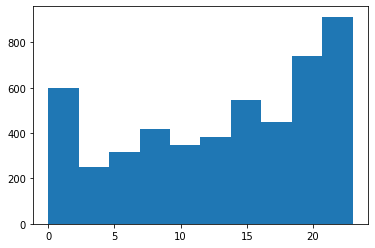

In [12]:
plt.hist(Z2['HORA_'])

## From this histogram, it can be seen that the highest quantity of murders are committed from 18:00 and around 02:00  in Colombia in 2018

In [13]:
(homicidios_2018['FECHA']).value_counts().head(10)

01/01/2018 12:00:00 AM    82
08/07/2018 12:00:00 AM    72
08/04/2018 12:00:00 AM    67
08/12/2018 12:00:00 AM    67
12/08/2018 12:00:00 AM    65
11/02/2018 12:00:00 AM    64
03/06/2018 12:00:00 AM    62
02/09/2018 12:00:00 AM    60
09/09/2018 12:00:00 AM    58
05/08/2018 12:00:00 AM    56
Name: FECHA, dtype: int64

# 3. c. What other insights can you extract from this dataset?

### To answer this, I first asked myself a question I wanted to find in the dataset, then I found myself a bit intrigued by the idea if there were more homicides in no working days compared to working days and how they compared each other considering the number of working days vs no working ones. Let's see how I worked it out all the way along until finding an answer to these.

In the coding developed below, I will create a new column called 'Tipo de dia', which gives us information if the days of the homicide is a working or no working day, this is done by considering the colombian public holidays in 2018.

In [14]:
def tipo_dia(df,__DIAS_FESTIVOS_2018):
    for index, row in df.iterrows():
        if row['DIA'] == 'SABADO':
            df.loc[[index],['TIPO DIA']] = 'NO LABORAL'
        elif row['DIA'] == 'DOMINGO':
            df.loc[[index],['TIPO DIA']] = 'NO LABORAL'
        else:
            found = 0
            count = 0
            while ((count < (len(__DIAS_FESTIVOS_2018))) & (found == 0)):
                if row['FECHA'] == __DIAS_FESTIVOS_2018[count]:
                    df.loc[[index],['TIPO DIA']] = 'NO LABORAL'
                    found = 1
                count += 1
            if found == 0:
                df.loc[[index],['TIPO DIA']] = 'LABORAL'


__DIAS_FESTIVOS_2018 = (['01/01/2018 12:00:00 AM','08/01/2018 12:00:00 AM','19/03/2018 12:00:00 AM','29/03/2018 12:00:00 AM',
                       '30/03/2018 12:00:00 AM','01/04/2018 12:00:00 AM','14/04/2018 12:00:00 AM','04/06/2018 12:00:00 AM',
                       '11/06/2018 12:00:00 AM','02/07/2018 12:00:00 AM','20/07/2018 12:00:00 AM','07/08/2018 12:00:00 AM',
                       '20/08/2018 12:00:00 AM','15/10/2018 12:00:00 AM','05/11/2018 12:00:00 AM','12/11/2018 12:00:00 AM',
                       '08/12/2018 12:00:00 AM','25/12/2018 12:00:00 AM'])
homicidios_2018['TIPO DIA'] = ''
tipo_dia(homicidios_2018,__DIAS_FESTIVOS_2018)

    
                                  

In [15]:
homicidios_2018

,FECHA,DEPARTAMENTO,MUNICIPIO,DIA,HORA,BARRIO,ZONA,CLASE SITIO,ARMA EMPLEADA,MOVIL AGRESOR,...,PAIS NACIMIENTO,CLASE EMPLEADO,ESCOLARIDAD,CODIGO DANE,NUMERO_DIA,MES,ANO,HORA_,MINUTOS_,TIPO DIA
0,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),LUNES,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,BRASIL,EMPLEADO PARTICULAR,SECUNDARIA,91001000.0,1,1,2018,9,45,NO LABORAL
1,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),LUNES,9:45:00,ESPERANZA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,BRASIL,EMPLEADO PARTICULAR,SECUNDARIA,91001000.0,1,1,2018,9,45,NO LABORAL
2,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,LUNES,8:30:00,ALTO DEL CEDRON,RURAL,VIAS PUBLICAS,ARMA DE FUEGO,A PIE,...,COLOMBIA,INDEPENDIENTE,PRIMARIA,5034000.0,1,1,2018,8,30,NO LABORAL
3,01/01/2018 12:00:00 AM,ANTIOQUIA,ANDES,LUNES,2:30:00,PARQUE PRINCIPAL,RURAL,PARQUES,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,COLOMBIA,AGRICULTOR,PRIMARIA,5034000.0,1,1,2018,2,30,NO LABORAL
4,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,3:30:00,TENCHE,RURAL,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,...,COLOMBIA,INDEPENDIENTE,PRIMARIA,5040000.0,1,1,2018,3,30,NO LABORAL
5,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,7:40:00,LA GUACAMAYA,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,...,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5040000.0,1,1,2018,7,40,NO LABORAL
6,01/01/2018 12:00:00 AM,ANTIOQUIA,ANORÍ,LUNES,5:35:00,PARQUE PRINCIPAL,URBANA,"BARES, CANTINAS Y SIMILARES",ARMA BLANCA / CORTOPUNZANTE,A PIE,...,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5040000.0,1,1,2018,5,35,NO LABORAL
7,01/01/2018 12:00:00 AM,ANTIOQUIA,CAUCASIA,LUNES,0:01:00,EL BOSQUE,URBANA,TRAMO DE VIA,CONTUNDENTES,A PIE,...,COLOMBIA,INDEPENDIENTE,PRIMARIA,5154000.0,1,1,2018,0,1,NO LABORAL
8,01/01/2018 12:00:00 AM,ANTIOQUIA,HISPANIA,LUNES,18:30:00,LA CANCHA,URBANA,ESTABLECIMIENTO PUBLICO,ARMA DE FUEGO,A PIE,...,COLOMBIA,EMPLEADO PARTICULAR,TECNOLOGO,5353000.0,1,1,2018,18,30,NO LABORAL
9,01/01/2018 12:00:00 AM,ANTIOQUIA,ITAGUI,LUNES,2:45:00,SANTA MARIA # 2,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,ARMA DE FUEGO,PASAJERO MOTOCICLETA,...,COLOMBIA,INDEPENDIENTE,SECUNDARIA,5360000.0,1,1,2018,2,45,NO LABORAL


Analysing working vs no working days homicides (results below), it can be seen that around 44% of homicides are commited in no working days (Monday, Sunday and public holidays) these days only represent a 33% of the total days in a year though. This behavour tell us that these days might need more attention from local authorities.

In [16]:
lab = (homicidios_2018['TIPO DIA']).value_counts()
lab

LABORAL       2771
NO LABORAL    2193
Name: TIPO DIA, dtype: int64

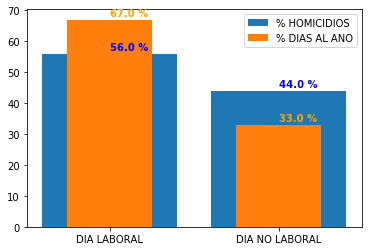

In [17]:
homicidios_laboral = np.round(lab['LABORAL']/len(homicidios_2018.index)*100)
homicidios_no_laboral = np.round(lab['NO LABORAL']/len(homicidios_2018.index)*100)
dias_no_laboral = np.round(121/365*100)
dias_laboral = (100-dias_no_laboral)
plt.bar(list(['DIA LABORAL','DIA NO LABORAL']),[homicidios_laboral,homicidios_no_laboral], label = '% HOMICIDIOS' )
plt.text(0, homicidios_laboral+1, str(homicidios_laboral)+' %', color='blue', fontweight='bold')
plt.text(1, homicidios_no_laboral+1, str(homicidios_no_laboral)+' %', color='blue', fontweight='bold')
plt.bar(list(['DIA LABORAL','DIA NO LABORAL']),[dias_laboral,dias_no_laboral], width=0.5, label = '% DIAS AL ANO')
plt.text(0, dias_laboral+1, str(dias_laboral)+' %', color='orange', fontweight='bold')
plt.text(1, dias_no_laboral+1, str(dias_no_laboral)+' %', color='orange', fontweight='bold')
plt.legend()
plt.show()

# 4. What is the most dangerous department or municipality in the Country (in terms of murders)? Do you need additional information for making this decision?

In [18]:
most_dangerous_department = homicidios_2018['DEPARTAMENTO'].value_counts().head(1)
print('The most dangerous department in terms of murders is ' + str(most_dangerous_department.index[0]) +' with a number of '+ str(most_dangerous_department[0])+ ' homicides only in 2018 ')
most_dangerous_municipality = homicidios_2018['MUNICIPIO'].value_counts().head(1)
print('The most dangerous municipality in terms of murders is ' + str(most_dangerous_municipality.index[0]) +' with a number of '+ str(most_dangerous_municipality[0])+ ' homicides only in 2018 ')


The most dangerous department in terms of murders is ANTIOQUIA with a number of 925 homicides only in 2018 
The most dangerous municipality in terms of murders is CALI (CT) with a number of 489 homicides only in 2018 


<div class="alert alert-block alert-success">
Even if in 2018 those two were the most dangerous department or municipality, I would not conclude that in general terms they are the most dangerous as of now, <b>I would say it is required to have more historical data</b> to come to this conclusion.
</div>

# 5. Would make sense a machine learning model for supporting police force in its work? What kind of model would you choose (regression, classification, clustering)? Train one and evaluate its performance.

Using the scikit-learn cheat sheet and the dataset characteristics, I would use clustering model to determine in a specific month and the regions that require more attention from the police

In [19]:
new_homicidios_2018 = homicidios_2018.loc[:,['DEPARTAMENTO','MES','DIA','TIPO DIA','EDAD','ARMA EMPLEADA']]
new_homicidios_2018

,DEPARTAMENTO,MES,DIA,TIPO DIA,EDAD,ARMA EMPLEADA
0,AMAZONAS,1,LUNES,NO LABORAL,16.0,ARMA BLANCA / CORTOPUNZANTE
1,AMAZONAS,1,LUNES,NO LABORAL,17.0,ARMA BLANCA / CORTOPUNZANTE
2,ANTIOQUIA,1,LUNES,NO LABORAL,26.0,ARMA DE FUEGO
3,ANTIOQUIA,1,LUNES,NO LABORAL,30.0,ARMA BLANCA / CORTOPUNZANTE
4,ANTIOQUIA,1,LUNES,NO LABORAL,25.0,ARMA BLANCA / CORTOPUNZANTE
5,ANTIOQUIA,1,LUNES,NO LABORAL,56.0,ARMA BLANCA / CORTOPUNZANTE
6,ANTIOQUIA,1,LUNES,NO LABORAL,25.0,ARMA BLANCA / CORTOPUNZANTE
7,ANTIOQUIA,1,LUNES,NO LABORAL,19.0,CONTUNDENTES
8,ANTIOQUIA,1,LUNES,NO LABORAL,32.0,ARMA DE FUEGO
9,ANTIOQUIA,1,LUNES,NO LABORAL,25.0,ARMA DE FUEGO


Using some classifier models, these were the results, where the KNeighbors and SCV classifiers performed better than Naives but still the accurracy resulted in 10%, which is very low.

Accuracy: 0.10738255033557047
Accuracy: 0.11543624161073826
Accuracy: 0.10604026845637583


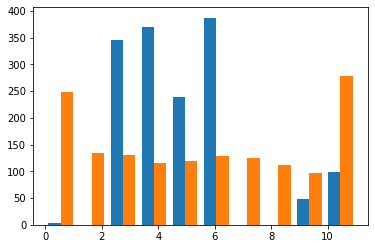

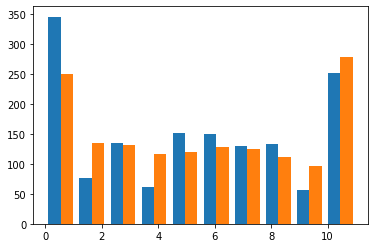

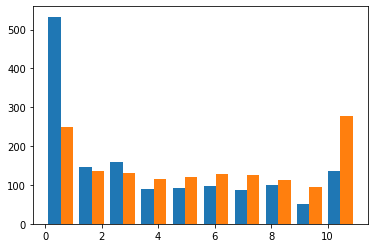

In [20]:
# Importing label encoder
from sklearn import preprocessing
#creating labelEncoder
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()

# Converting string labels into numbers.
department_encoded = le1.fit_transform(new_homicidios_2018['DEPARTAMENTO'])
fecha_encoded = le2.fit_transform(new_homicidios_2018['MES'])
dia_encoded = le3.fit_transform(new_homicidios_2018['TIPO DIA'])
arma_encoded = le4.fit_transform(new_homicidios_2018['ARMA EMPLEADA'])
dia_semana_encoded = le5.fit_transform(new_homicidios_2018['DIA'])

encoded_homicidios_2018 = pd.DataFrame()
encoded_homicidios_2018['DEPARTAMENTO'] = department_encoded
encoded_homicidios_2018['MES'] = fecha_encoded
encoded_homicidios_2018['DIA'] = dia_semana_encoded
encoded_homicidios_2018['TIPO DIA'] = dia_encoded
encoded_homicidios_2018['EDAD'] = new_homicidios_2018['EDAD']
encoded_homicidios_2018['ARMA EMPLEADA'] = arma_encoded

X = encoded_homicidios_2018.drop('MES', axis=1) # axis = 1 por que estamos eliminando una columna
y = encoded_homicidios_2018['MES']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Combinig department and tipo dia into single list of tuples
features=zip(np.reshape(department_encoded,len(department_encoded)),np.reshape(dia_encoded,len(dia_encoded)))

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.figure()
plt.hist([y_pred, y_test])

#Import SVC model
from sklearn.svm import SVC

#Create a SVS
model = SVC(gamma='auto')

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.figure()
plt.hist([y_pred, y_test])

#Import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

#Create a KNeighbors Classifier
model = KNeighborsClassifier()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.figure()
plt.hist([y_pred, y_test])
fechas_pred = pd.Series(le2.inverse_transform(y_pred))


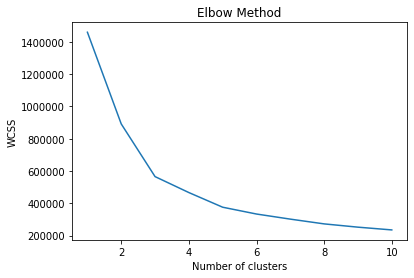

In [21]:
# Elbow method to determine best number of clusters using the graph
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(encoded_homicidios_2018)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
n_clusters=3
model = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

#Clustering data from dataset
y_pred = model.fit_predict(encoded_homicidios_2018)
encoded_homicidios_2018['CLUSTER'] = y_pred
#decoding_clusters = encoded_homicidios_2018['cluster']
decoding_clusters = pd.DataFrame()
decoding_clusters['DEPARTAMENTO'] = le1.inverse_transform(encoded_homicidios_2018['DEPARTAMENTO'])
decoding_clusters['MES'] = le2.inverse_transform(encoded_homicidios_2018['MES'])
decoding_clusters['DIA'] = le5.inverse_transform(encoded_homicidios_2018['DIA'])
decoding_clusters['TIPO DIA'] = le3.inverse_transform(encoded_homicidios_2018['TIPO DIA'])
decoding_clusters['ARMA EMPLEADA'] = le4.inverse_transform(encoded_homicidios_2018['ARMA EMPLEADA'])
decoding_clusters['EDAD'] = encoded_homicidios_2018['EDAD']
decoding_clusters['CLUSTER'] = y_pred

cluster = {}

for i in range(n_clusters):
    print('Cluster '+str(i))
    cluster[i] = (decoding_clusters[decoding_clusters['CLUSTER'] == i])
    print((cluster[i]['DEPARTAMENTO']).value_counts().head())
    print((cluster[i]['MES']).value_counts().head())
    print((cluster[i]['DIA']).value_counts().head())
    print((cluster[i]['TIPO DIA']).value_counts().head())
    print((cluster[i]['EDAD']).value_counts().head())
    print((cluster[i]['ARMA EMPLEADA']).value_counts().head())


Cluster 0
ANTIOQUIA       784
CUNDINAMARCA    423
CAUCA           222
ATLÁNTICO       181
BOLÍVAR         133
Name: DEPARTAMENTO, dtype: int64
2     220
4     207
12    205
7     201
6     197
Name: MES, dtype: int64
DOMINGO      503
SABADO       375
LUNES        347
MIERCOLES    273
JUEVES       266
Name: DIA, dtype: int64
LABORAL       1235
NO LABORAL    1017
Name: TIPO DIA, dtype: int64
23.0    118
30.0    113
21.0    111
24.0    111
25.0    109
Name: EDAD, dtype: int64
ARMA DE FUEGO                         1591
ARMA BLANCA / CORTOPUNZANTE            544
CONTUNDENTES                            87
ARTEFACTO EXPLOSIVO/CARGA DINAMITA      14
BOLSA PLASTICA                           4
Name: ARMA EMPLEADA, dtype: int64
Cluster 1
CUNDINAMARCA    158
VALLE           141
ANTIOQUIA       141
CAUCA            60
NARIÑO           55
Name: DEPARTAMENTO, dtype: int64
8     101
12     99
9      97
2      96
6      95
Name: MES, dtype: int64
DOMINGO    213
SABADO     188
LUNES      171
MARTES     